### Importação dos dados



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

In [4]:
# URLs dos dados
urls = {
    'Loja 1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    'Loja 2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    'Loja 3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    'Loja 4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

In [5]:
# Carga dos dados
dados_lojas = {}

for nome_loja, url in urls.items():
    dados_lojas[nome_loja] = pd.read_csv(url)
    print(f"{nome_loja} carregada: {len(dados_lojas[nome_loja])} registros")

print("ANÁLISE EXPLORATÓRIA DAS LOJAS")


✓ Loja 1 carregada: 2359 registros
✓ Loja 2 carregada: 2359 registros
✓ Loja 3 carregada: 2359 registros
✓ Loja 4 carregada: 2358 registros
ANÁLISE EXPLORATÓRIA DAS LOJAS


#1. Análise do faturamento


In [6]:
faturamentos = {}

for nome_loja, df in dados_lojas.items():
    faturamento = df['Preço'].sum()
    faturamentos[nome_loja] = faturamento
    print(f"{nome_loja}: R$ {faturamento:,.2f}")


Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


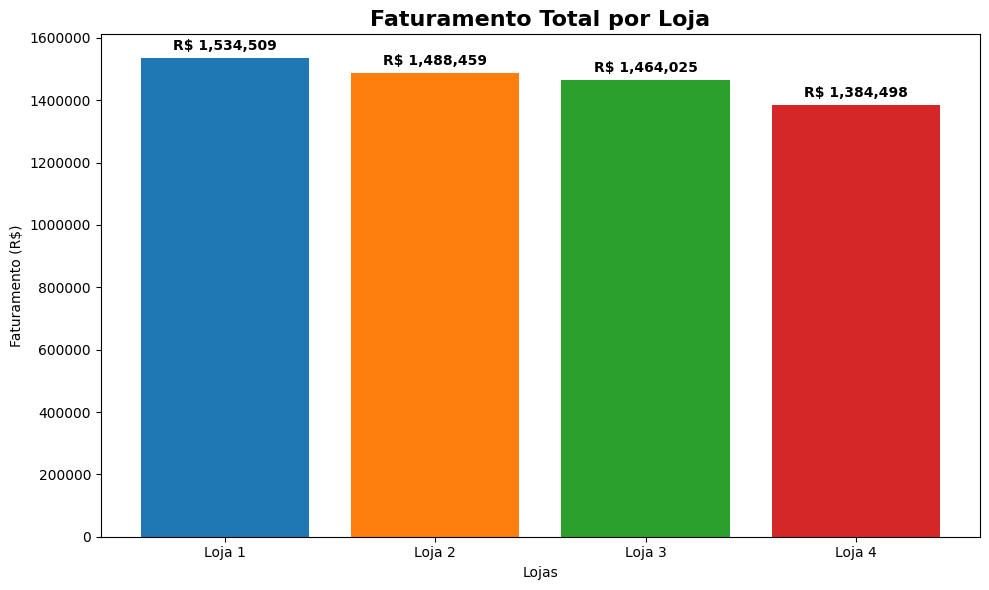

In [7]:
# Gráfico de faturamento
plt.figure(figsize=(10, 6))
lojas = list(faturamentos.keys())
valores = list(faturamentos.values())
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.bar(lojas, valores, color=cores)
plt.title('Faturamento Total por Loja', fontsize=16, fontweight='bold')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.ticklabel_format(style='plain', axis='y')

# Adicionando valores no topo das barras
for i, v in enumerate(valores):
    plt.text(i, v + max(valores)*0.01, f'R$ {v:,.0f}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [8]:
for nome_loja, df in dados_lojas.items():
    vendas_categoria = df.groupby('Categoria do Produto')['Produto'].count().sort_values(ascending=False)
    print(f"\n{nome_loja}:")
    for categoria, quantidade in vendas_categoria.items():
        print(f"  {categoria}: {quantidade} produtos")


Loja 1:
  moveis: 465 produtos
  eletronicos: 448 produtos
  brinquedos: 324 produtos
  eletrodomesticos: 312 produtos
  esporte e lazer: 284 produtos
  instrumentos musicais: 182 produtos
  livros: 173 produtos
  utilidades domesticas: 171 produtos

Loja 2:
  moveis: 442 produtos
  eletronicos: 422 produtos
  brinquedos: 313 produtos
  eletrodomesticos: 305 produtos
  esporte e lazer: 275 produtos
  instrumentos musicais: 224 produtos
  livros: 197 produtos
  utilidades domesticas: 181 produtos

Loja 3:
  moveis: 499 produtos
  eletronicos: 451 produtos
  brinquedos: 315 produtos
  eletrodomesticos: 278 produtos
  esporte e lazer: 277 produtos
  livros: 185 produtos
  instrumentos musicais: 177 produtos
  utilidades domesticas: 177 produtos

Loja 4:
  moveis: 480 produtos
  eletronicos: 451 produtos
  brinquedos: 338 produtos
  esporte e lazer: 277 produtos
  eletrodomesticos: 254 produtos
  utilidades domesticas: 201 produtos
  livros: 187 produtos
  instrumentos musicais: 170 produ

<Figure size 1400x800 with 0 Axes>

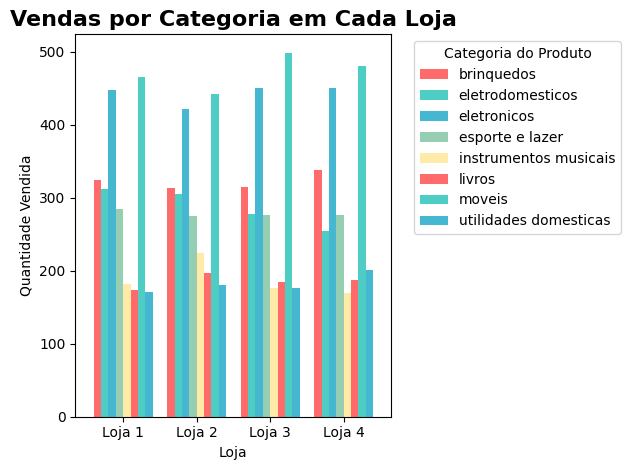

In [9]:
# Gráfico consolidado por categoria
plt.figure(figsize=(14, 8))

# Concatenar todos os dados
all_stores_df = pd.concat(dados_lojas.values(), keys=dados_lojas.keys(), names=['Loja', None])

# Agrupar por loja e categoria
vendas_por_categoria_por_loja = all_stores_df.groupby(['Loja', 'Categoria do Produto'])['Produto'].count().unstack(fill_value=0)

# Plotar
ax = vendas_por_categoria_por_loja.plot(kind='bar', width=0.8, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
ax.set_title('Vendas por Categoria em Cada Loja', fontsize=16, fontweight='bold')
ax.set_xlabel('Loja')
ax.set_ylabel('Quantidade Vendida')
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Categoria do Produto', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [10]:
avaliacoes = {}
for nome_loja, df in dados_lojas.items():
    if 'Avaliação da compra' in df.columns:
        media_avaliacao = df['Avaliação da compra'].mean()
        avaliacoes[nome_loja] = media_avaliacao
        print(f"{nome_loja}: {media_avaliacao:.2f} / 5.0")

Loja 1: 3.98 / 5.0
Loja 2: 4.04 / 5.0
Loja 3: 4.05 / 5.0
Loja 4: 4.00 / 5.0


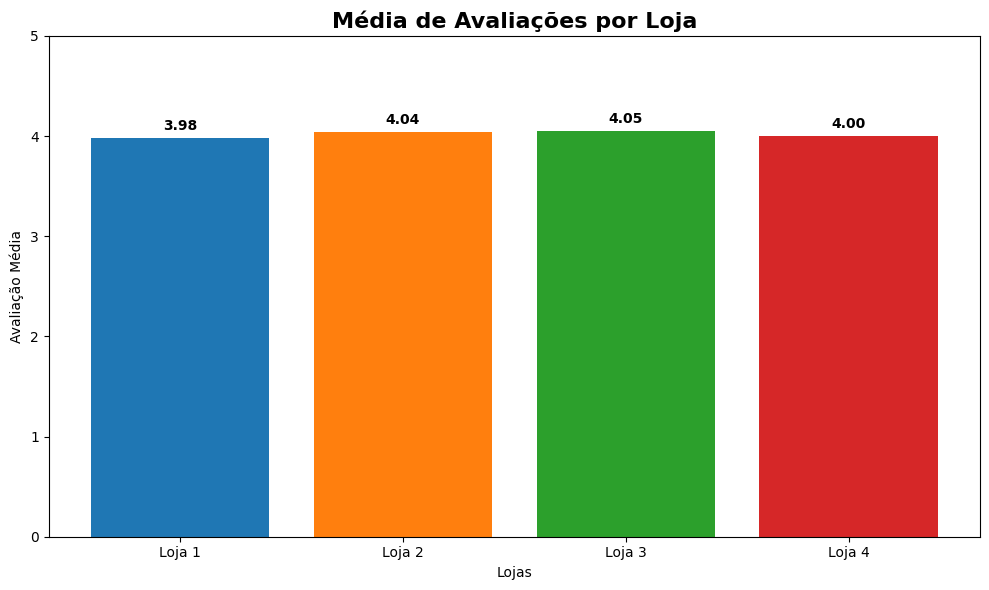

In [11]:
# Gráfico de avaliações
if avaliacoes:
    plt.figure(figsize=(10, 6))
    lojas_aval = list(avaliacoes.keys())
    medias_aval = list(avaliacoes.values())

    bars = plt.bar(lojas_aval, medias_aval, color=cores[:len(lojas_aval)])
    plt.title('Média de Avaliações por Loja', fontsize=16, fontweight='bold')
    plt.xlabel('Lojas')
    plt.ylabel('Avaliação Média')
    plt.ylim(0, 5)

    # Adicionando valores nas barras
    for bar, valor in zip(bars, medias_aval):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                f'{valor:.2f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

# 4. Produtos Mais e Menos Vendidos

In [12]:
for nome_loja, df in dados_lojas.items():
    vendas_produto = df.groupby('Produto')['Produto'].count().sort_values(ascending=False)
    print(f"\n{nome_loja}:")
    print(f"  Mais vendido: {vendas_produto.index[0]} ({vendas_produto.iloc[0]} vendas)")
    print(f"  Menos vendido: {vendas_produto.index[-1]} ({vendas_produto.iloc[-1]} vendas)")



Loja 1:
  Mais vendido: TV Led UHD 4K (60 vendas)
  Menos vendido: Headset (33 vendas)

Loja 2:
  Mais vendido: Iniciando em programação (65 vendas)
  Menos vendido: Jogo de tabuleiro (32 vendas)

Loja 3:
  Mais vendido: Kit banquetas (57 vendas)
  Menos vendido: Blocos de montar (35 vendas)

Loja 4:
  Mais vendido: Cama box (62 vendas)
  Menos vendido: Guitarra (33 vendas)


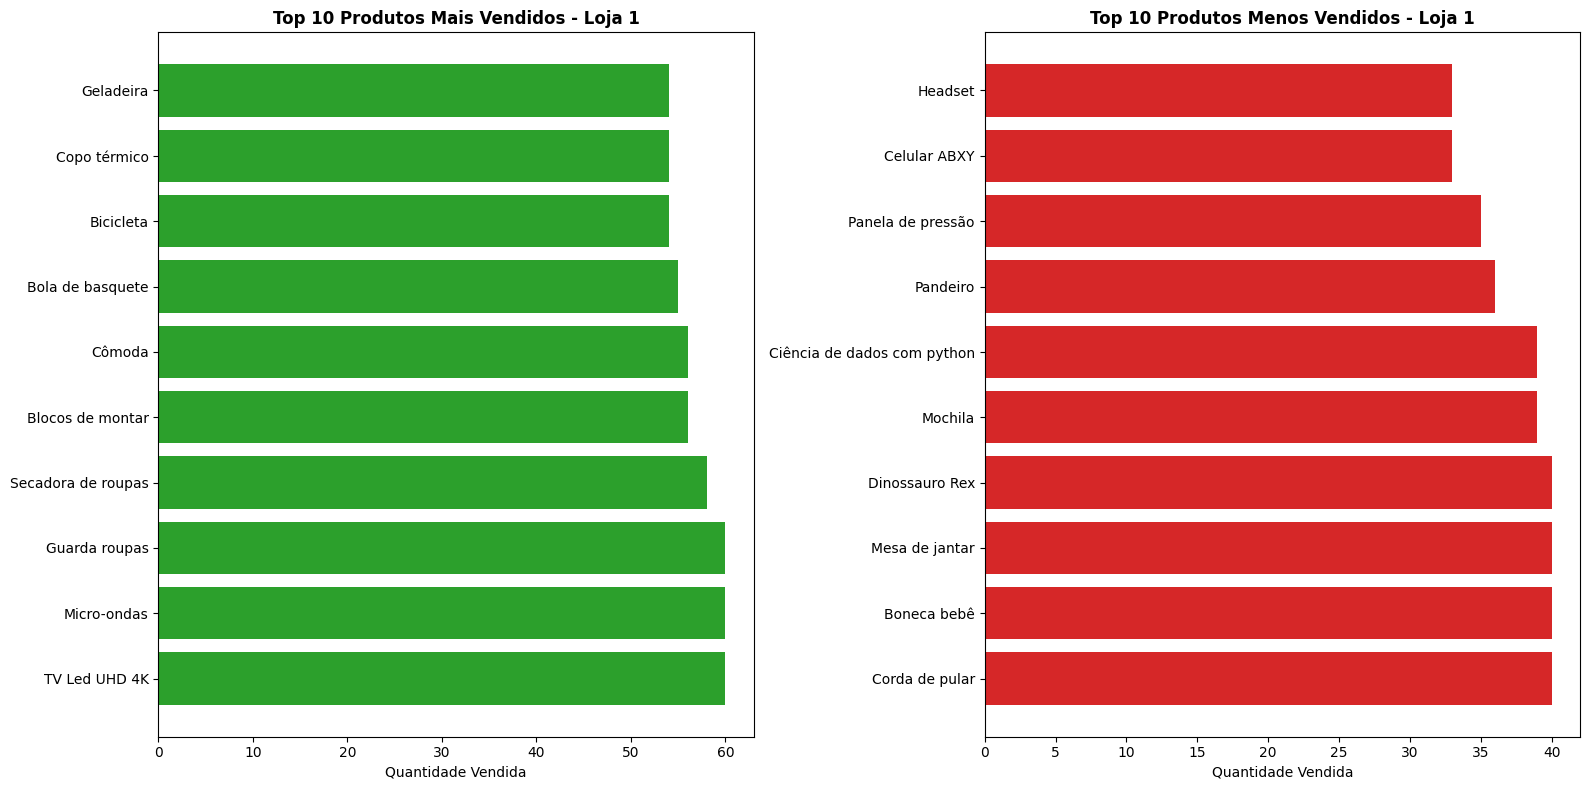

In [13]:
# Gráfico detalhado para Loja 1 (exemplo)
loja1_vendas = dados_lojas['Loja 1'].groupby('Produto')['Produto'].count().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Top 10 mais vendidos
mais_vendidos = loja1_vendas.head(10)
ax1.barh(range(len(mais_vendidos)), mais_vendidos.values, color='#2ca02c')
ax1.set_yticks(range(len(mais_vendidos)))
ax1.set_yticklabels(mais_vendidos.index)
ax1.set_title('Top 10 Produtos Mais Vendidos - Loja 1', fontweight='bold')
ax1.set_xlabel('Quantidade Vendida')

# Top 10 menos vendidos
menos_vendidos = loja1_vendas.tail(10)
ax2.barh(range(len(menos_vendidos)), menos_vendidos.values, color='#d62728')
ax2.set_yticks(range(len(menos_vendidos)))
ax2.set_yticklabels(menos_vendidos.index)
ax2.set_title('Top 10 Produtos Menos Vendidos - Loja 1', fontweight='bold')
ax2.set_xlabel('Quantidade Vendida')

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [14]:
fretes_medios = {}
for nome_loja, df in dados_lojas.items():
    if 'Frete' in df.columns:
        frete_medio = df['Frete'].mean()
        fretes_medios[nome_loja] = frete_medio
        print(f"{nome_loja}: R$ {frete_medio:.2f}")


Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


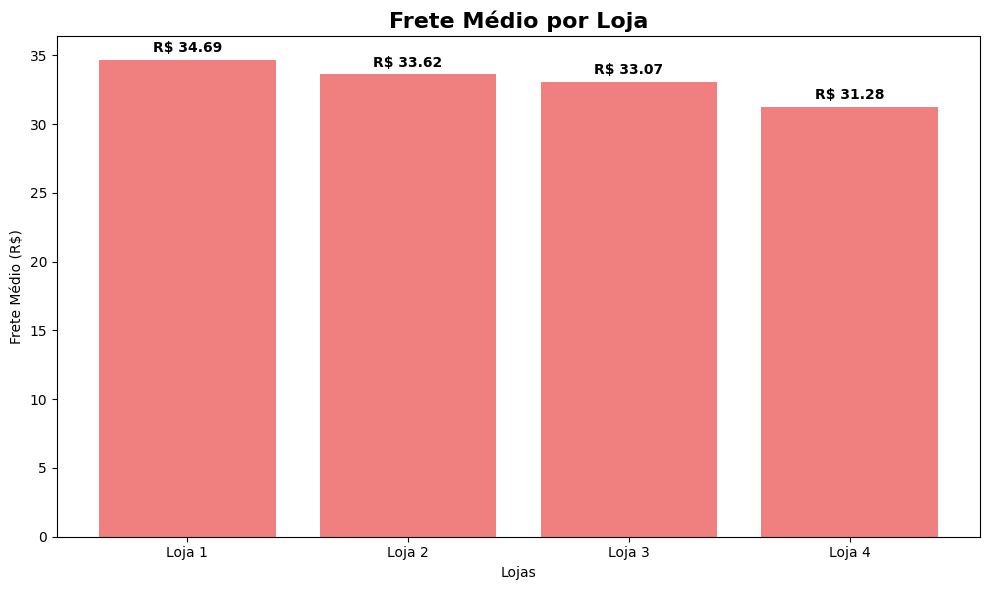

In [15]:
if fretes_medios:
    plt.figure(figsize=(10, 6))
    lojas_frete = list(fretes_medios.keys())
    valores_frete = list(fretes_medios.values())

    bars = plt.bar(lojas_frete, valores_frete, color='lightcoral')
    plt.title('Frete Médio por Loja', fontsize=16, fontweight='bold')
    plt.xlabel('Lojas')
    plt.ylabel('Frete Médio (R$)')

    # Adicionando valores nas barras
    for bar, valor in zip(bars, valores_frete):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(valores_frete)*0.01,
                f'R$ {valor:.2f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

# Relatorio Final

In [16]:
# Loja por faturamento
melhor_faturamento = max(faturamentos, key=faturamentos.get)
print(f"Maior faturamento: {melhor_faturamento} (R$ {faturamentos[melhor_faturamento]:,.2f})")

# Loja por avaliação
if avaliacoes:
    melhor_avaliacao = max(avaliacoes, key=avaliacoes.get)
    print(f"Melhor avaliada: {melhor_avaliacao} ({avaliacoes[melhor_avaliacao]:.2f}/5.0)")

# Menor frete médio
if fretes_medios:
    menor_frete = min(fretes_medios, key=fretes_medios.get)
    print(f"Menor frete médio: {menor_frete} (R$ {fretes_medios[menor_frete]:.2f})")

# Total geral
total_vendas = sum(len(df) for df in dados_lojas.values())
faturamento_total = sum(faturamentos.values())

print(f"\nTOTAIS GERAIS:")
print(f"Total de vendas: {total_vendas:,} transações")
print(f"Faturamento total: R$ {faturamento_total:,.2f}")
print(f"Ticket médio geral: R$ {faturamento_total/total_vendas:.2f}")

print("\nAnálise concluída")

Maior faturamento: Loja 1 (R$ 1,534,509.12)
Melhor avaliada: Loja 3 (4.05/5.0)
Menor frete médio: Loja 4 (R$ 31.28)

TOTAIS GERAIS:
Total de vendas: 9,435 transações
Faturamento total: R$ 5,871,490.79
Ticket médio geral: R$ 622.31

Análise concluída com sucesso!
